> [!Warning] 
> **This project is still in an early phase of development.**
>
> The [python API](../api.html) is not yet stable, and some aspects of the schema for the [blueprint](../terminology.html#term-blueprint) will likely evolve. 
> Therefore whilst you are welcome to try out using the package, we cannot yet guarantee backwards compatibility. 
We expect to reach a more stable version in Q1 2025.
>
> To see which systems C-Star has been tested on so far, see [Supported Systems](../machines.html).

# Restarting & continuing a `ROMSSimulation`

## Contents
1. [Introduction](#1.-Introduction)
2. [Restoring and restarting the Simulation](#2.-Restoring-and-restarting-the-Simulation)
   - [Restoring](#Restoring)
   - [Restarting](#Restarting)
   - [Modifying the time step](#Modifying-the-time-step)
3. [Running the restarted Simulation](#3.-Running-the-restarted-Case)
4. [Some basic analysis of the output](#4.-Some-basic-analysis-of-the-output)



## 1. Introduction

[(return to top)](#Contents)

In this guide we will:

- Take the Simulation we ran for two days (2012-01-01 to 2012-01-03) on the [previous page](../tutorials/2_importing_and_running_a_simulation_from_a_blueprint.html) and create a new Simulation that picks up where it ends (`ROMSSimulation.restart()`)
- Run this second case with a larger time step for the remainder of the month of January 2012
- Produce a basic plot of the output

On the [previous page](../tutorials/2_importing_and_running_a_simulation_from_a_blueprint.html), we began this run from a set of prescribed initial conditions and ran it for two days with a short time step of 1 minute. We should now be able to safely restart the model with a slightly larger time step.
To do this, we can use the `ROMSSimulation.restart()` method, which returns a new `ROMSSimulation` whose start date corresponds to the end date of the Simulation we began with, and whose initial conditions are replaced with a restart file from our previous run. The directory of the restart will be a subdirectory of the original simulation directory.

## 2. Restoring and restarting the Simulation

[(return to top)](#Contents)

### Restoring
First, we restore the previously created simulation using `ROMSSimulation.restore()`. The state of the `ROMSSimulation` is regularly saved to a file in the `directory` so it can be restored exactly in a new python session.

In [ ]:
from cstar.roms import ROMSSimulation

original_simulation = ROMSSimulation.restore(
    directory="../../examples/roms_marbl_example_case"
)


### Restarting
Now, we can create a new `ROMSSimulation` that picks up where this `ROMSSimulation` ended using `ROMSSimulation.restart()`. Some points:
- We supply a `new_end_date` (the new *start* date is simply the previous end date)
- The `directory` of the new, restarted `ROMSSimulation` is automatically generated as a subdirectory of the previous `directory`
- The initial conditions of the new simulation are automatically replaced with a restart file generated by ROMS during the previous run

In [ ]:
restarted_simulation = original_simulation.restart(new_end_date="2012-01-31 12:00:00")


Taking a look at the simulation, we can see that the initial conditions have been changed:

In [ ]:
restarted_simulation.initial_conditions


ROMSInitialConditions(
location = '/Users/dafyddstephenson/Code/my_c_star/examples/roms_marbl_example_case/output/ROMS_MARBL_rst.20120103120000.nc',
file_hash = None,
start_date = datetime.datetime(2012, 1, 3, 12, 0),
)

### Modifying the time step

If we want to increase the time step for our second run, we will have to manually change the `time_step` entry under `ROMSSimulation.discretization`:

In [ ]:
restarted_simulation


ROMSSimulation(
name = roms_marbl_example_cstar_simulation,
directory = /Users/dafyddstephenson/Code/my_c_star/examples/roms_marbl_example_case/RESTART_20120103_120000,
start_date = 2012-01-03 12:00:00,
end_date = 2012-01-31 12:00:00,
valid_start_date = 2012-01-01 12:00:00,
valid_end_date = 2012-01-31 12:00:00,
discretization = ROMSDiscretization(time_step = 60, n_procs_x = 3, n_procs_y = 3),
codebase = <ROMSExternalCodeBase instance>,
runtime_code = <AdditionalCode instance>,
compile_time_code = <AdditionalCode instance>
model_grid = <ROMSModelGrid instance>,
initial_conditions = <ROMSInitialConditions instance>,
tidal_forcing = <ROMSTidalForcing instance>,
river_forcing = <ROMSRiverForcing instance>,
surface_forcing = <list of 2 ROMSSurfaceForcing instances>,
boundary_forcing = <list of 2 ROMSBoundaryForcing instances>,
)

In [ ]:
restarted_simulation.discretization.time_step = 360


We can now take a look at our `ROMSSimulation` and see everything is as expected:

In [ ]:
restarted_simulation


ROMSSimulation(
name = roms_marbl_example_cstar_simulation,
directory = /Users/dafyddstephenson/Code/my_c_star/examples/roms_marbl_example_case/RESTART_20120103_120000,
start_date = 2012-01-03 12:00:00,
end_date = 2012-01-31 12:00:00,
valid_start_date = 2012-01-01 12:00:00,
valid_end_date = 2012-01-31 12:00:00,
discretization = ROMSDiscretization(time_step = 360, n_procs_x = 3, n_procs_y = 3),
codebase = <ROMSExternalCodeBase instance>,
runtime_code = <AdditionalCode instance>,
compile_time_code = <AdditionalCode instance>
model_grid = <ROMSModelGrid instance>,
initial_conditions = <ROMSInitialConditions instance>,
tidal_forcing = <ROMSTidalForcing instance>,
river_forcing = <ROMSRiverForcing instance>,
surface_forcing = <list of 2 ROMSSurfaceForcing instances>,
boundary_forcing = <list of 2 ROMSBoundaryForcing instances>,
)

## 3. Running the restarted `Case`

[(return to top)](#Contents)

Now we run through the other steps as normal:

In [ ]:
restarted_simulation.log.info("OI")


[INFO] OI


In [ ]:
restarted_simulation.setup()
restarted_simulation.build()
restarted_simulation.pre_run()


[INFO] 🛠️  Configuring ROMSSimulation
[INFO] 🔧 Setting up ROMSExternalCodeBase...
[INFO] ✅ ROMSExternalCodeBase correctly configured. Nothing to be done
[INFO] 🔧 Setting up MARBLExternalCodeBase...
[INFO] ✅ MARBLExternalCodeBase correctly configured. Nothing to be done
[INFO] 📦 Fetching compile-time code...
[INFO] 📦 Fetching runtime code... 
[INFO] 📦 Fetching input datasets...


[INFO] Partitioning /Users/dafyddstephenson/Code/my_c_star/examples/roms_marbl_example_case/RESTART_20120103_120000/ROMS/input_datasets/ROMS_MARBL_rst.20120103120000.nc into (3,3)


In [ ]:
simulation_run = restarted_simulation.run()


As on the [previous page](../tutorials/2_importing_and_running_a_simulation_from_a_blueprint.html), we are running this Simulation [locally](../howto_guides/4_running_on_personal_computers.html). The call to `ROMSSimulation.run()` would be different on a supported [supercomputing system](../howto_guides/5_handling_jobs_on_hpc_systems.html).

In [ ]:
simulation_run.status


<ExecutionStatus.RUNNING: 3>

Once again, we have to wait for the job to finish before proceeding...

In [ ]:
simulation_run.status


<ExecutionStatus.COMPLETED: 4>

In [ ]:
restarted_simulation.post_run()


[INFO] Joining netCDF files ROMS_MARBL_his.20120103120000.*.nc...
[INFO] Joining netCDF files ROMS_MARBL_rst.20120123120000.*.nc...
[INFO] Joining netCDF files ROMS_MARBL_rst.20120112120000.*.nc...
[INFO] Joining netCDF files ROMS_MARBL_rst.20120115120000.*.nc...
[INFO] Joining netCDF files ROMS_MARBL_rst.20120127120000.*.nc...
[INFO] Joining netCDF files ROMS_MARBL_rst.20120129120000.*.nc...
[INFO] Joining netCDF files ROMS_MARBL_rst.20120104120000.*.nc...
[INFO] Joining netCDF files ROMS_MARBL_bgc.20120103120000.*.nc...
[INFO] Joining netCDF files ROMS_MARBL_rst.20120130120000.*.nc...
[INFO] Joining netCDF files ROMS_MARBL_rst.20120128120000.*.nc...
[INFO] Joining netCDF files ROMS_MARBL_rst.20120105120000.*.nc...
[INFO] Joining netCDF files ROMS_MARBL_rst.20120120120000.*.nc...
[INFO] Joining netCDF files ROMS_MARBL_rst.20120114120000.*.nc...
[INFO] Joining netCDF files ROMS_MARBL_rst.20120126120000.*.nc...
[INFO] Joining netCDF files ROMS_MARBL_rst.20120131120000.*.nc...
[INFO] Joi

## 4. Some basic analysis of the output

[(return to top)](#Contents)

Now we've finished running the model, we have a month of output to take a look at. 

C-Star doesn't currently support plots of model data, so we will have to manually produce plots from the model files. Don't worry too much about understanding the model's naming conventions in this code cell (C-Star will usually take care of these things for you) - this is just a visual demonstration!

In [ ]:
%matplotlib inline


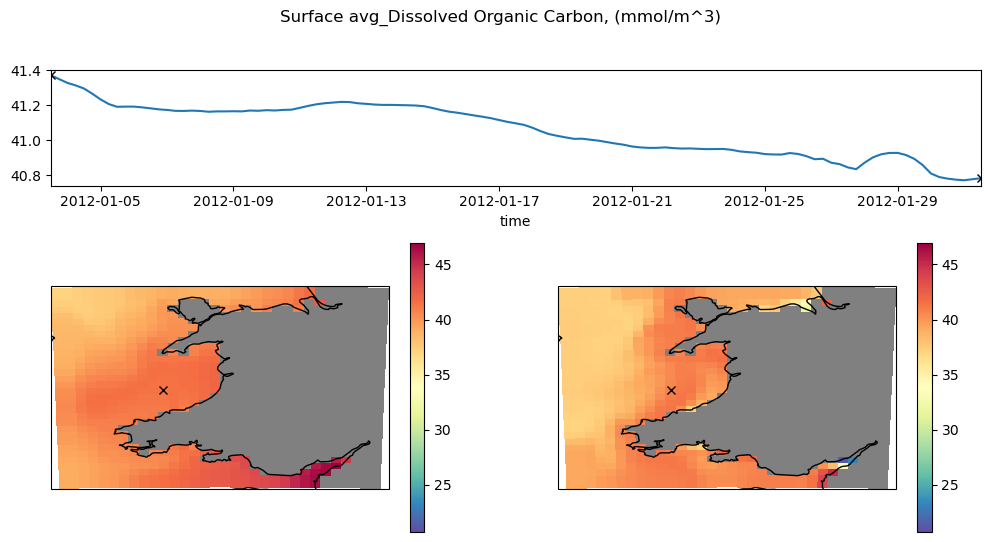

In [ ]:
%matplotlib inline
import datetime as dt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from matplotlib.gridspec import GridSpec

 # this contains 6-hourly data, with the date in the filename reflecting the first time entry
bgc_ds = xr.open_dataset(restarted_simulation.directory / "output/ROMS_MARBL_bgc.20120103120000.nc")
grd_ds = xr.open_dataset(restarted_simulation.directory / "ROMS/input_datasets/roms_grd.nc")
lon, lat = grd_ds.lon_rho, grd_ds.lat_rho
output_time = [dt.datetime(2000, 1, 1) + dt.timedelta(seconds=t) for t in bgc_ds.ocean_time.values]

var = "DOC"
i_idx = 10
j_idx = 15
k_idx = 19
t_idx = [0, -1]

plot_data = bgc_ds[var].where(grd_ds.mask_rho).isel(s_rho=k_idx)


fig = plt.figure()
cmap = plt.get_cmap("Spectral_r")
cmap.set_bad("grey")

gs = GridSpec(3, 2, figure=fig, hspace=0.5)

# time series
ax1 = fig.add_subplot(gs[0, :])

ax1.plot(output_time, plot_data[:, j_idx, i_idx])

ax1.set_xlim(output_time[0], output_time[-1])
ax1.set_xlabel("time")
ax1.plot(output_time[t_idx[0]], plot_data[t_idx[0], j_idx, i_idx], "kx")
ax1.plot(output_time[t_idx[-1]], plot_data[t_idx[-1], j_idx, i_idx], "kx")


# Maps
ax2 = fig.add_subplot(gs[1:, 0], projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(gs[1:, 1], projection=ccrs.PlateCarree())

VMIN = np.min(plot_data.values[plot_data.values > 0])
VMAX = np.max(plot_data.values[plot_data.values > 0])

p2 = ax2.pcolormesh(lon, lat, plot_data.isel(time=0).values, vmin=VMIN, vmax=VMAX, cmap=cmap)
p3 = ax3.pcolormesh(lon, lat, plot_data.isel(time=-1).values, vmin=VMIN, vmax=VMAX, cmap=cmap)
[a.set_xticks([]) for a in [ax2, ax3]]
[a.set_yticks([]) for a in [ax2, ax3]]

ax2.set_title("")
ax2.plot(lon[j_idx, i_idx].values - 360, lat[j_idx, i_idx].values, "kx")
ax3.plot(lon[j_idx, i_idx].values - 360, lat[j_idx, i_idx].values, "kx")

[a.add_feature(cfeature.COASTLINE, linewidth=1) for a in [ax3, ax2]]
fig.colorbar(p2, ax=ax2)
fig.colorbar(p3, ax=ax3)

fig.suptitle(f"Surface {bgc_ds[var].long_name}, ({bgc_ds[var].units})")
fig.set_size_inches(12, 6)
grd_ds.close()
